# **Model *Selection*  File**

In [1]:
#importing Dependencies
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
%matplotlib inline
from google.colab import files
import os
import random
nltk.download("popular")
nltk.download('stopwords')
# Using the stopwords.
from nltk.corpus import stopwords
# Initialize the stopwords
stoplist = stopwords.words('english')
from collections import Counter
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [2]:
#importing the data
from google.colab import files
  
  
uploaded = files.upload()

df = pd.read_csv('Context.csv')

Saving Context.csv to Context.csv


In [3]:
df = df[pd.notnull(df['Context/Topic'])]
print(df.head(10))
print(df['Text'].apply(lambda x: len(x.split(' '))).sum())

                                                Text  Context/Topic
0              The eternal mystique of Goldman Sachs       Politics
1  Either you don't care enough to actually tell ...           Love
2                                I am such an IDIOT.  Heavy Emotion
3  While lifting weights on Friday and doing bent...         Health
4                            Something's watching me        Animals
5  Plantação de palma na Indonésia é uma dura rea...        Animals
6  The Milky Way Project: Probing Star Formation ...        Science
7  The pinnacle of American Financial Journalism,...           Joke
8  South African variant can 'break through' Pfiz...         Health
9  New Study Finds National Nostalgia, More Than ...        Science
769223


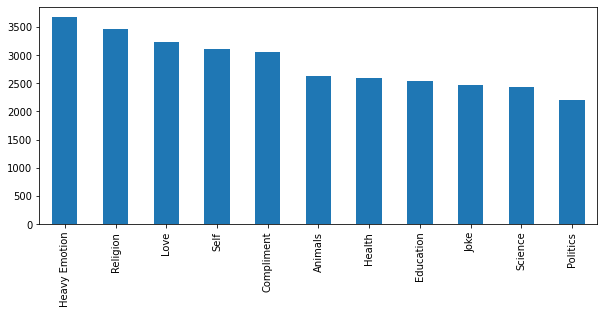

In [4]:
my_tags = list(set(df['Context/Topic'].unique()))
plt.figure(figsize=(10,4))
df['Context/Topic'].value_counts().plot(kind='bar');

In [5]:
#function to print the values
def print_plot(index):
    example = df[df.index == index][['Text', 'Context/Topic']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Context/Topic:', example[1])

print_plot(58)

Why hasn't any deity helped out their believers?  Maybe if the Muslims were exempt from catching this, we might see that Islam has some truth to it, or perhaps if the Christians weren't catching it, or the Jews, or Hindus, etc.  
Context/Topic: Religion


In [11]:
##Cleaning the Data
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def cleansingLayer(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
df['Text'] = df['Text'].apply(cleansingLayer)
print_plot(58)


stop = stopwords.words("english")
df['Text']= df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
lemmatizer = WordNetLemmatizer()
df['Text']=df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Text']=df['Text'].apply(lambda x:"".join([lemmatizer.lemmatize(y) for y in x]))
df.head(5)

df['Text'] = df['Text'].apply(cleansingLayer)
print_plot(58)

hasnt deity helped believers maybe muslims exempt catching might see islam truth perhaps christians werent catching jews hindus etc
Context/Topic: Religion
hasnt deity helped believers maybe muslims exempt catching might see islam truth perhaps christians werent catching jews hindus etc
Context/Topic: Religion


In [12]:
df['Text'].apply(lambda x: len(x.split(' '))).sum()

405692

In [13]:
#converting it into the category for better analysis
df['category_id'] = df['Context/Topic'].factorize()[0]
category_id_df = df[['Context/Topic', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Context/Topic']].values)
df.head()

,Text,Context/Topic,category_id
0,eternal mystique goldman sachs,Politics,0
1,either dont care enough actually tell u feel d...,Love,1
2,idiot,Heavy Emotion,2
3,lifting weights friday bent rows felt sharp pa...,Health,3
4,somethings watching,Animals,4


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Text).toarray()
labels = df.category_id
features.shape

(31386, 11601)

In [15]:
#collecting Ngrams for the category_id
from sklearn.feature_selection import chi2
import numpy as np
N = 5
for Context, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Context))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Animals':
  . Most correlated unigrams:
. dogs
. cat
. animal
. dog
. animals
  . Most correlated bigrams:
. little guy
. animals world
. help save
. wild animals
. critter science
# 'Compliment':
  . Most correlated unigrams:
. awesome
. thank
. congratulations
. proud
. congrats
  . Most correlated bigrams:
. great job
. thats amazing
. thats awesome
. good job
. im proud
# 'Education':
  . Most correlated unigrams:
. schools
. education
. training
. noida
. school
  . Most correlated bigrams:
. online school
. training center
. center noida
. noida sector
. training noida
# 'Health':
  . Most correlated unigrams:
. benefits
. weight
. treatment
. ad_1
. health
  . Most correlated bigrams:
. skin care
. lose weight
. ad_1 mens_health
. health benefits
. weight loss
# 'Heavy Emotion':
  . Most correlated unigrams:
. shit
. vent
. hate
. fucking
. fuck
  . Most correlated bigrams:
. dont know
. im fucking
. need vent
. feel like
. im tired
# 'Joke':
  . Most correlated unigrams:
. r

*Algorithm 1 : MultinomialNB*

In [16]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Context/Topic'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [17]:
print(clf.predict(count_vect.transform(["Let me give you an example. The manager stands up and holds his hand in front of the metal pole holding up the tent. Punch my hand as hard as you can."])))

['Joke']


***Trying out Logistic,RF and LinearSVC Algorithms***


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


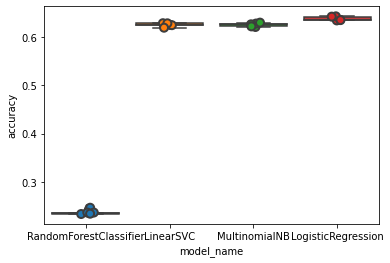

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [19]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.625597
LogisticRegression        0.638469
MultinomialNB             0.625789
RandomForestClassifier    0.237016
Name: accuracy, dtype: float64

Selecting the best possible algorithm.This Case it is **Logistic**.so Our Training Will be done on this

In [20]:
model = LogisticRegression(random_state=0)
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy 0.6387333462058312


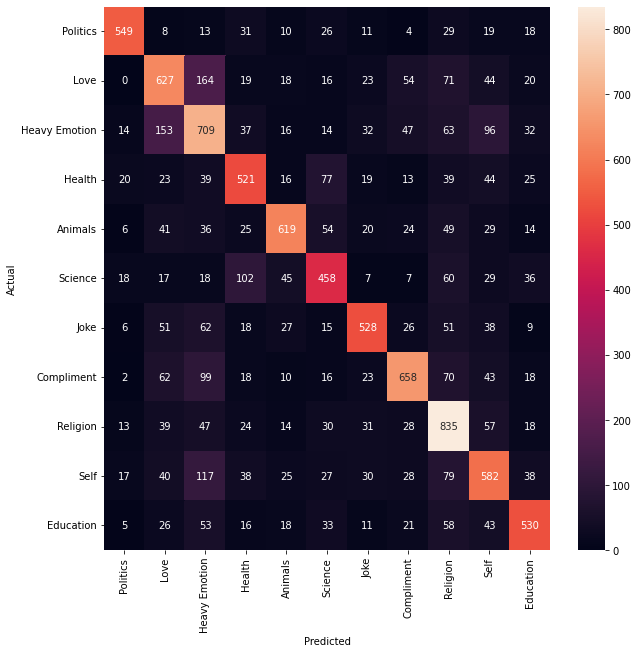

In [21]:
from sklearn.metrics import accuracy_score
print('accuracy %s' % accuracy_score(y_pred, y_test))
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df['Context/Topic'].values, yticklabels=category_id_df['Context/Topic'].values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [26]:
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score

myscore = make_scorer(roc_auc_score, multi_class='ovo',needs_proba=True)

from sklearn.model_selection import cross_validate
cross_validate(model, X_train, y_train, cv=10, scoring = myscore)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'fit_time': array([176.75209284, 181.33958411, 175.68282914, 176.97144794,
        179.68422651, 176.49059224, 177.04814625, 178.47376251,
        181.84094739, 181.02516842]),
 'score_time': array([0.26913595, 0.25782919, 0.25322723, 0.23954558, 0.23911762,
        0.23869371, 0.25144887, 0.238837  , 0.24988937, 0.26228738]),
 'test_score': array([0.91476703, 0.9208344 , 0.9177691 , 0.915299  , 0.92579949,
        0.92345524, 0.91690057, 0.91646016, 0.91975713, 0.91567256])}